
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Luis! Tu trabajo es excelente. 

Demuestras un dominio sólido de los conceptos y los aplicas de forma correcta y coherente en cada paso del proyecto.


</div>

# Paso 1. 
### Abre el archivo de datos y estudia la información general

In [1]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas de la carga de los datasets! Esto mejora la estructura y claridad de tu código.


</div>

In [2]:
#Carga de datos
videogames_2016=pd.read_csv("/datasets/games.csv")


# Paso 2.
### Prepara los datos


***Reemplazo de los nombres de las columnas por valores con pura minúscula***

In [3]:
#Variable global que se utilizará en el for para ir enlistando los nuevos nombres de columna
new_columns_names=[]
#Generación y acumulación de nombres de columnas llevados a minúscula
for col in videogames_2016.columns:
    name_lowered=col.lower()
    new_columns_names.append(name_lowered)
#Colocación de nuevos nombres de columnas en el dataframe original
videogames_2016.columns=new_columns_names

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Se ha realizado el ajuste en el nombre de las columnas de forma correcta. 

</div>

***Convierte los datos en los tipos necesarios***

In [4]:
#Transformación de los datos no ausentes de "año de liberación" de string a número
videogames_2016["year_of_release"] = pd.to_numeric(videogames_2016["year_of_release"], errors='coerce')
#Transformación de los datos no ausentes de "año de liberación" de flotante a enteros
videogames_2016["year_of_release"] = videogames_2016["year_of_release"].astype("Int64")
#Transformación de los datos no ausentes de "valoración del usuario" de string a número
videogames_2016["user_score"] = pd.to_numeric(videogames_2016["user_score"], errors='coerce')
##Transformación de los datos no ausentes de "valoración del crítico" de escala 100 a escala 10
videogames_2016["critic_score"]=videogames_2016["critic_score"]/10
videogames_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


***Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué***

1. La columna "year_of_release" fue cambiada de tipo object a float, y luego posteriormente a int, debido a que al estar hablando de años de liberación de los videojuegos, se puede pensar que se puede llegar a hacer uso de estos datos para descubrir comportamientos; por lo que se requieren estos datos en formato número y específicamente en tipo int porque los años no se escriben como decimales.
2. La columna "user_score" fue cambiada de tipo object a float debido a que al estar hablando de evaluaciones hechas a los videojuegos en forma de números, se puede pensar que se puede llegar a hacer uso de estos datos para descubrir comportamientos; por lo que se requieren estos datos en formato número. Se propone dejarlos como float porque se tomará como estandar para este ejercicio que las evaluaciones (de usuarios y críticos) estén en una escala de 0 a 10 y se pueda tener un decimal.
3. Debido a lo mencionado en el punto anterior, es que se llevó la columna "critic_score" a valores dentro de una escala entre 0 y 10. 

***Si es necesario, elige la manera de tratar los valores ausentes:***

***-Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.***

***-¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.***

***-Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.***

In [5]:
#se detecta para la columna "genre" 2 valores ausentes. Se extraen y analizará el motivo de estos
print(videogames_2016[videogames_2016["genre"].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [6]:
#Se detecta que estas dos filas no son de utilidad porque no brindan información suficiente de juegos 
#(no cuentan con información como nombre del juego, género, etc.)
#Se decide que se eliminaran estas dos filas
videogames_2016=videogames_2016.dropna(subset=["genre"])
videogames_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Nota:** Los valores "tbd" (que solo prevalecían en la columna "user_score") ya fueron tratados y convertidos a valores nulos (NaN) debido a las transformaciones de string a número generadas en pasos anteriores.

**Nota:** Se decidirá mantener los valores ausentes de la columnas "year_of_release", "critic_score" y "user_score" porque manipular esos ausentes con valores como la mediana o media de la población podría generar alteraciones a la distribución real, debido a estar inventando puntuaciones que nunca existieron, o años de liberación de juegos que no fueron los verdaderos años.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo! Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Los valores de Year_of_release se pueden cambiar a cero o eliminarse. Por su parte, no hay mucho que se puede hacer con los valores nulos de critic_score y user_score, los cuales se pueden dejar a null.

</div>

In [7]:
#se detecta que existe una considerable cantidad de filas con valores ausentes
#en las columnas "critic_score", "user_score" y "rating".
#se procede a verificar si esas líneas agregan utilidad al resto de datos cn base
#en el resto de información que brindan
critic_score_nan=videogames_2016[videogames_2016["critic_score"].isna()]
critic_user_score_nan=critic_score_nan[critic_score_nan["user_score"].isna()]
print("El número de videojuegos que no cuentan con valoración de usuario y crítico es: ",critic_user_score_nan["name"].size)
#De esta lista de videojuegos que no tienen valoraciones, se detecta que la gran mayoría cuenta con
#menos de 1 millón de dólares en ventas tanto en NA, EU, JP y otras regiones.
#Se procede a analizar la cantidad de videojuegos que su no. de ventas en cada región es >1
print("El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en EU es: ",critic_user_score_nan[critic_user_score_nan["eu_sales"]>1].size)
print("El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en NA es: ",critic_user_score_nan[critic_user_score_nan["na_sales"]>1].size)
print("El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en JP es: ",critic_user_score_nan[critic_user_score_nan["jp_sales"]>1].size)

El número de videojuegos que no cuentan con valoración de usuario y crítico es:  8003
El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en EU es:  1298
El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en NA es:  3113
El número de videojuegos que no cuentan con valoración de usuario y crítico, y que tienen ventas de más de 1M en JP es:  1672


Se toma la decisión de no eliminar dichos datos por los siguientes motivos:
1. Representan éxito comercial real:
- 3,113 juegos con >1M ventas en NA (39% de los sin valoraciones)
- 1,672 juegos con >1M ventas en JP (21% de los sin valoraciones)  
- 1,298 juegos con >1M ventas en EU (16% de los sin valoraciones)

2. Sesgo en la definición de "éxito":
- Eliminarlos implicaría que solo consideras exitosos los juegos con buenas reseñas
- Pero el éxito comercial es independiente de las valoraciones críticas
- Muchos juegos pueden ser exitosos sin reseñas (juegos casuales, de nicho, etc.)

***Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.***

In [8]:
#Ceación de columna que suma las ventas que cada una de las regiones
videogames_2016["total_sales"]=videogames_2016["eu_sales"]+videogames_2016["na_sales"]+videogames_2016["jp_sales"]+videogames_2016["other_sales"]
videogames_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo calculando las ventas totales.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Otra forma de hacerlo es de la siguiente manera:

	data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

</div>

</div>



# Paso 3.
### Analiza los datos




***Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?***

In [9]:
years_of_release_list = videogames_2016['year_of_release'].unique().to_numpy().tolist()
release_year=[]
num_games_in_year=[]
for year in years_of_release_list:
    release_year.append(year)
    num_games=videogames_2016[videogames_2016["year_of_release"]==year]["name"].count()
    num_games_in_year.append(num_games)
release_year_series = pd.Series(release_year)
num_games_in_year_series = pd.Series(num_games_in_year)
num_games_released_per_year=pd.concat([release_year_series,num_games_in_year_series],axis="columns")
num_games_released_per_year.columns=["release_year","num_games_in_year"]
num_games_released_per_year.sort_values(by="release_year",inplace=True)
print(num_games_released_per_year)

   release_year  num_games_in_year
36         1980                  9
34         1981                 46
26         1982                 36
37         1983                 17
6          1984                 14
1          1985                 14
29         1986                 21
35         1987                 16
14         1988                 15
5          1989                 17
13         1990                 16
33         1991                 41
22         1992                 43
24         1993                 60
25         1994                121
32         1995                219
4          1996                263
23         1997                289
18         1998                379
8          1999                338
30         2000                350
16         2001                482
15         2002                829
28         2003                775
12         2004                762
7          2005                939
0          2006               1006
9          2007     

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente traajo Luis! Sin embargo, nota que sería muy interesante utilizar un grafico de barras para mostrar estos resultados.

</div>


Con estos datos es posible distinguir ciertos periodos en los cuales ha sido más notoria la inversión generada en creación de juegos y cómo ha sido el comportamiento de esta producción con el paso de los años. De hecho, se puede percibir que a partir de 1994 comezó esa tendencia creciente en invertir en la producción de videojuegos puesto que se percibe un continuo crecimiento del número de juegos liberados por año a partir del año mencionado, llegando a un pico en el año 2008 y 2009.

***Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?***

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03



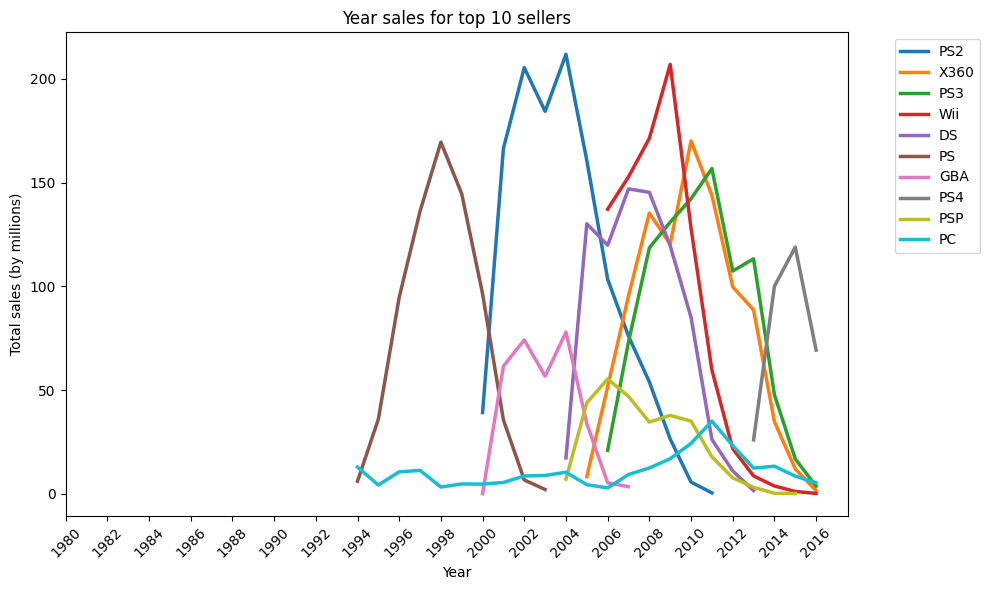

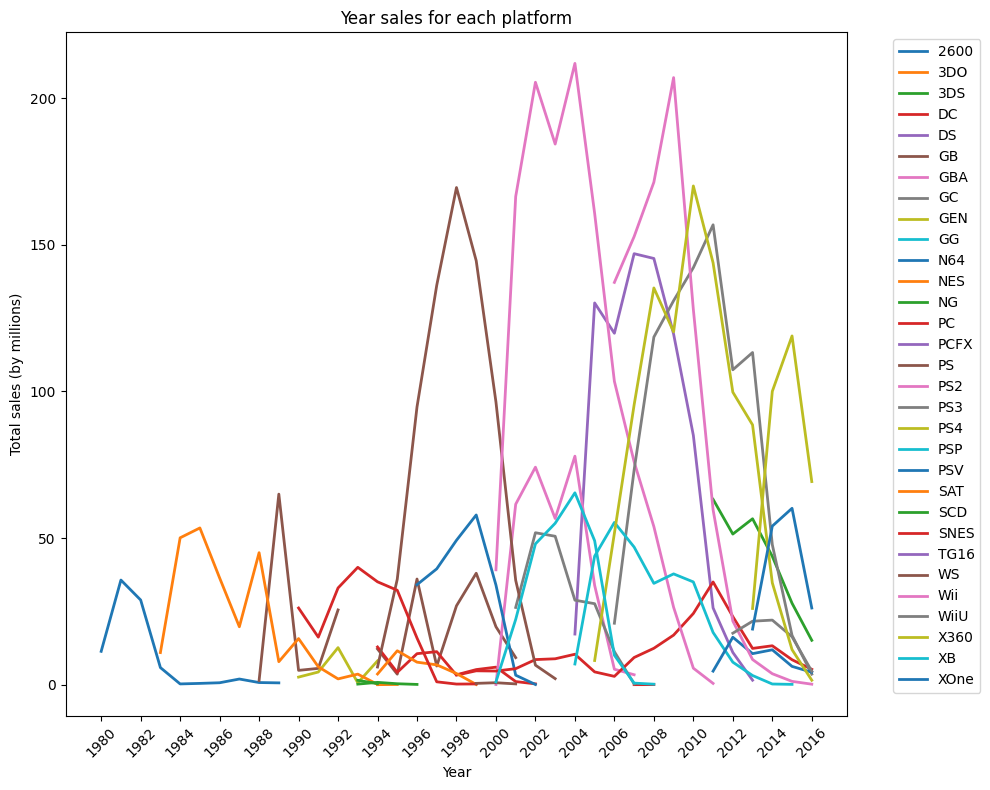

Las plataformas que aún tienen considerables ventas para 2016 son:
 platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
Name: 2016, dtype: float64


In [10]:
#Filtrado de los videojuegos por plataforma para conocer sus ventas por cada año
sales_by_platform_per_year=videogames_2016.pivot_table(index="platform",columns="year_of_release",values="total_sales",aggfunc="sum")
# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)        # Sin límite de ancho
pd.set_option('display.max_colwidth', None) # Sin límite de ancho de columna

#Obtención de las ventas totales de cada plataforma para conocer a los mayores vendedores
total_sales_by_platform=videogames_2016.groupby(by="platform")["total_sales"].sum().reset_index()
total_sales_by_platform.columns=("platform","total_sales")
total_sales_by_platform.sort_values(by="total_sales",ascending=False,inplace=True)

#Obtención de las distribuciones de ventas por año de los mayores vendedores
#Se tomarán los primeros 10 mejores vendedores de juegos
top_10_platforms = ["PS2","X360","PS3","Wii","DS","PS","GBA","PS4","PSP","PC"]
top_10_sellers = sales_by_platform_per_year.loc[top_10_platforms]


# Transponer la tabla para intercambiar filas y columnas
top_10_sellers_transposed = top_10_sellers.T
sales_by_platform_per_year_transposed = sales_by_platform_per_year.T



print(total_sales_by_platform)
print()
# Ahora graficar la distribución de ventas de los top 10 vendedores
top_10_sellers_transposed.plot(kind='line', figsize=(10,6), linewidth=2.5)
plt.title('Year sales for top 10 sellers')
plt.xlabel('Year')
plt.ylabel('Total sales (by millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
specific_years = [1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016]
plt.xticks(specific_years, rotation=45)
plt.tight_layout()
plt.show()

# Ahora graficar la distribución de ventas de todos los vendedores
sales_by_platform_per_year_transposed.plot(kind='line', figsize=(10,8), linewidth=2)
plt.title('Year sales for each platform')
plt.xlabel('Year')
plt.ylabel('Total sales (by millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
specific_years = [1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016]
plt.xticks(specific_years, rotation=45)
plt.tight_layout()
plt.show()

platforms_active_2016 = sales_by_platform_per_year[sales_by_platform_per_year[2016] > 0]
platforms_active_2016_sorted = platforms_active_2016.sort_values(by=2016, ascending=False)
print("Las plataformas que aún tienen considerables ventas para 2016 son:\n",platforms_active_2016_sorted[2016].head())

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico muestra claramente la evolución de las ventas anuales por plataforma. Las conclusiones asociadas se presentan claramente. 

</div>

Las plataformas que fueron populares pero que progresivamente han perdido popularidad (hablando de plataformas como PS, PS2, GBA o DS) han tenido los siguientes periodos de años en los que perdieron popularidad y terminaron desapareciendo (tomando como base su año de aparición):
- PS (1994-2003): 9 años
- PS2 (2000-2011): 11 años
- GBA (2000-2007): 7 años
- DS (2004-2013): 9 años

Por lo que se puede concluir que las plataformas que debido a su antigüedad, van perdiendo popularidad, suelen estar presentes en el mercado en un estimado de 7 a 11 años.

Por otra parte, si hacemos un análisis de la forma en que las plataformas van adquiriendo popularidad, podemos percibir los siguientes intervalos de años que le llevó a cada plataforma para llegar a su pico de ventas, o en otras palabras, el tiempo que le llevó a las plataformas en aparecer:
- PS2 (2000-2002):2 años
- X360 (2005-2008): 2 años
- PS3 (2006-2011): 5 años
- Wii (2006-2009): 3 años
- PS (1994-1998): 4 años
- DS (2004-2006): 2 años
- GBA (2000-2002): 2 años
- PS4 (2013-2015): 2 años
- PSP (2004-2006): 2 años
- PC (1994-2011): 17 años ¡Un caso extraordinario!

Por lo que se puede concluir que las plataformas suelen darse a conocer en un estimado de 2 a 4 años.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Realizas un análisis correcto del ciclo de vida de las consolas. 

</div>

***Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.***

Se considerará el intervalo de años 2014- a 2016, debido a que:
1. Datos respaldados por evidencia:
- Los gráficos anteriores muestran claramente que PS4, XOne, 3DS, PC y WiiU tienen ventas activas en 2016
- PS4 con 69.25M, XOne con 26.15M, 3DS con 15.14M son cifras muy significativas

2. Lógica temporal perfecta:
- 2014-2016 son los 3 años más cercanos a 2017
- Captura el período de crecimiento de PS4 y XOne (las plataformas "del futuro")
- Incluye el declive natural de plataformas anteriores

No se considerarán los datos de los juegos que no cuentan con información en "year_of_release", debido a que:

1. Imposibilidad de validar relevancia temporal: Sin año de liberación, no puedes confirmar si son juegos del período 2014-2016 que elegiste para tu modelo
2. Riesgo de contaminar el modelo: Podrían ser juegos muy antiguos que distorsionen los patrones actuales
3. Incertidumbre sobre el contexto: No sabes si su éxito es representativo del mercado actual


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El período analizado es correcto. En la dinámica industria de los videojuegos, tomar intervalos de tiempo largos debería evitarse, ya que definitivamente conducirá a rastrear tendencias obsoletas. Pero tampoco deberías tomar un período demasiado corto.

</div>

***Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.***

In [11]:
#Englobamiento de datos de ventas de plataformas solo en 2014, 2015 y 2016
platform_sales_2014_2015_2016=sales_by_platform_per_year[[2014,2015,2016]]
#Englobamiento de datos de videojuegos con año de liberación solo en 2014, 2015 y 2016
videogames_2014_2015_2016 = videogames_2016[videogames_2016["year_of_release"].isin([2014, 2015, 2016])]

***¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.***

Acorde al gráfico generado de la distribución de ventas de todas las plataformas, se puede percibir que no existe alguna plataforma en crecimiento al aproximarse al 2016, pero que en el periodo de 2014 a 2015 tuvieron crecimiento; las cuales son PS4 y XOne. Sin embargo, hay que considerar la relevancia que tiene la plataforma 3DS porque aunque en el periodo de 2014 a 2016 solo ha tenido reducción, sigue teniendo un margen de ventas considerable.

***Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.***

<Figure size 1200x600 with 0 Axes>

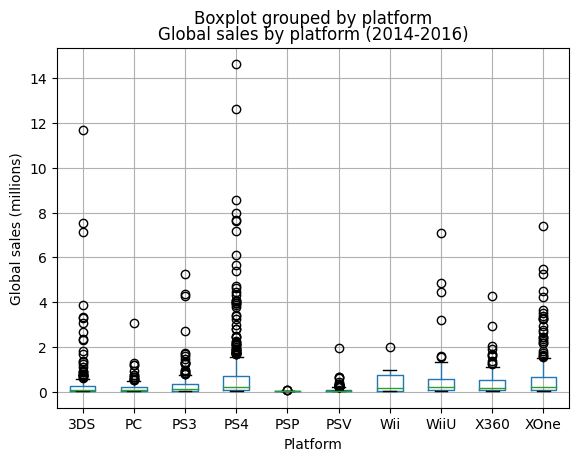

In [12]:
plt.figure(figsize=(12, 6))
videogames_2014_2015_2016.boxplot(column='total_sales', by='platform')
plt.title('Global sales by platform (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Global sales (millions)')
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aquí lo mejor es no mostrar los outliers para poder ver más claramente las cajas y poder realizar comparativas.

</div>

Se puede percibir que sí existen diferencias considerables de ventas de los videojuegos entre plataformas ya que, aunque las extensiones de las cajas no difieren tanto entre sí, los valores poco comunes de ventas entre cada plataforma son diferentes; donde podemos comparar (a manera de ejemplo) plataformas como PSP Y PS4, los cuales tienen valores poco comunes de ventas de 14M y 2 M, respectivamente.
AHora que, hablando de las ventas promedio entre varias plataformas, se puede percibir que no son muy diferentes las ventas promedio entre cada una de las plataformas, estando en valores de menos de 1M.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>


Nota que podrías profundizar mucho más tu análisis.

Un **boxplot** (o diagrama de caja y bigotes) es una herramienta gráfica que permite visualizar la distribución de un conjunto de datos de manera eficiente. Sus principales beneficios son:

1. **Resumir la distribución de los datos** → Muestra la mediana, cuartiles y valores extremos de un conjunto de datos de forma compacta.
2. **Detectar outliers fácilmente** → Los valores atípicos quedan representados fuera de los "bigotes", facilitando su identificación.
3. **Comparar distribuciones** → Útil para analizar cómo varían los datos entre diferentes categorías o grupos.
4. **Mostrar asimetría y dispersión** → Permite observar si los datos están sesgados y qué tan dispersos están.
5. **Resistencia a valores extremos** → No se ve tan afectado por outliers como otras visualizaciones, como histogramas o medias.

</div>

***Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.***

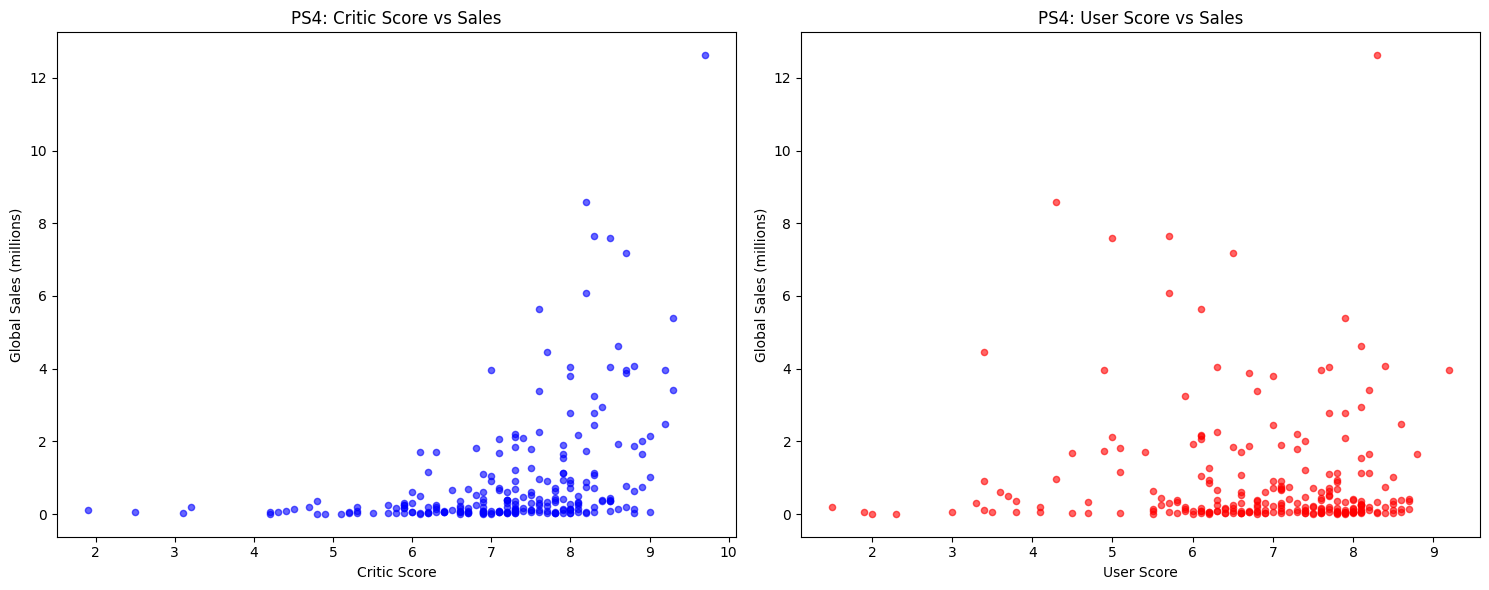

Correlación Critic Score vs Ventas: 0.402
Correlación User Score vs Ventas: -0.043


In [13]:
# Filtrar datos de PS4
ps4_info = videogames_2014_2015_2016[videogames_2014_2015_2016["platform"]=="PS4"]

# Crear subplots para mostrar ambos gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Critic Score vs Ventas
ps4_info.plot(kind="scatter", x="critic_score", y="total_sales", 
              ax=ax1, alpha=0.6, color='blue')
ax1.set_xlabel("Critic Score")
ax1.set_ylabel("Global Sales (millions)")
ax1.set_title("PS4: Critic Score vs Sales")

# Gráfico 2: User Score vs Ventas  
ps4_info.plot(kind="scatter", x="user_score", y="total_sales", 
              ax=ax2, alpha=0.6, color='red')
ax2.set_xlabel("User Score") 
ax2.set_ylabel("Global Sales (millions)")
ax2.set_title("PS4: User Score vs Sales")

plt.tight_layout()
plt.show()

# Calcular correlaciones (eliminando valores NaN)
ps4_info_cleaned = ps4_info.dropna(subset=['critic_score', 'user_score', 'total_sales'])

ps4_critic_correlation = ps4_info_cleaned['critic_score'].corr(ps4_info_cleaned['total_sales'])
ps4_user_correlation = ps4_info_cleaned['user_score'].corr(ps4_info_cleaned['total_sales'])

print(f"Correlación Critic Score vs Ventas: {ps4_critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {ps4_user_correlation:.3f}")

Considero que el coeficiente de correlación entre las ventas de los juegos de PS4 y sus valoraciones de críticos es bajo, por lo que no se puede confirmar que exista una relación lineal fuerte entre estas variables. Lo que sí se puede confirmar es que, al ser  un coeficiente positivo, existe una tendencia de crecimiento de las ventas conforme mayor es la valoración del crítico-

Considero que el coeficiente de correlación entre las ventas de los juegos de PS4 y sus valoraciones de usuarios es muy cercano a cero, por lo que se puede confirmar que no existe una relación lineal entre evaluación de usuarios con las ventas.

Esta información nos podría orillar a varias dudas e hipótesis, donde podamos pensar que el comportamiento de compra del usuario no esté relacionado con las críticas del experto; aunque no haya nada explícito aún que nos confirme eso.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Tal cual. Podemos ver una correlación positiva para las reseñas de los críticos, es decir, un puntaje más alto generalmente trae más ingresos. Sin embargo, la correlación entre el puntaje de los usuarios y los ingresos es casi cero, lo que significa que los ingresos por ventas no se ven muy afectados por la opinión de los usuarios.

</div>

***Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.***

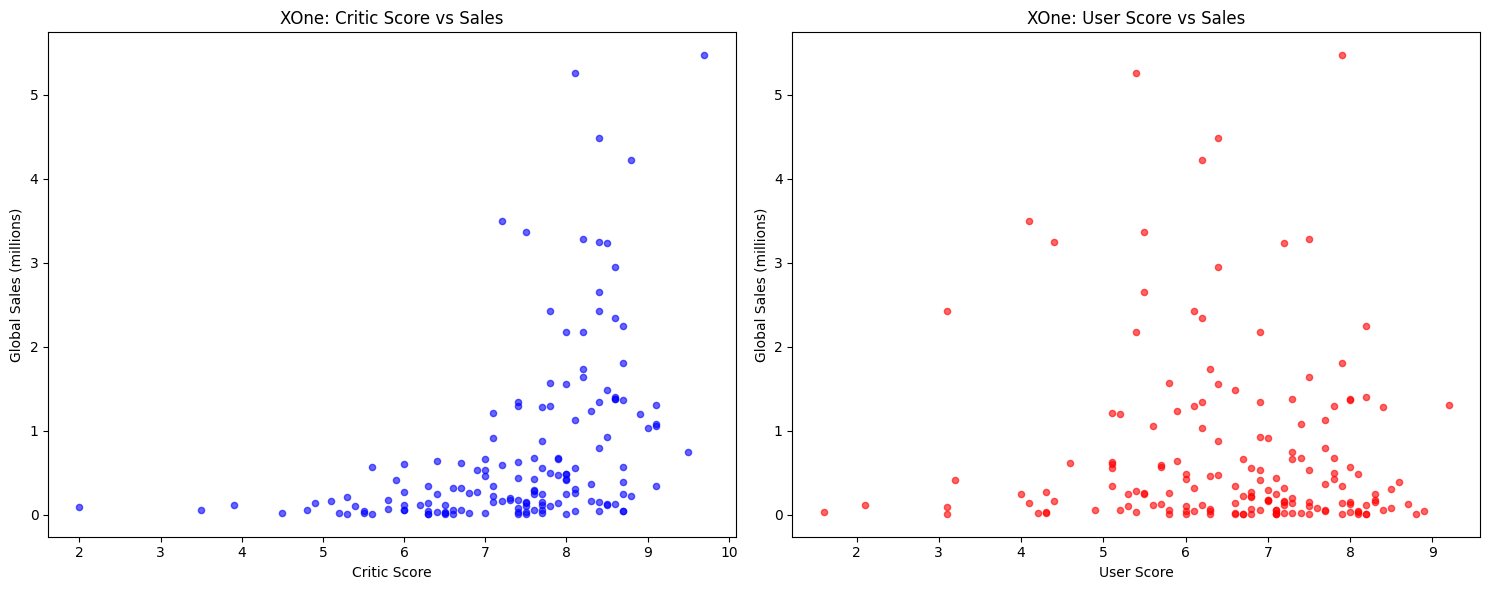

Correlación Critic Score vs Ventas: 0.422
Correlación User Score vs Ventas: -0.092


In [14]:
# Filtrar datos de XOne
xone_info = videogames_2014_2015_2016[videogames_2014_2015_2016["platform"]=="XOne"]

# Crear subplots para mostrar ambos gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Critic Score vs Ventas
xone_info.plot(kind="scatter", x="critic_score", y="total_sales", 
              ax=ax1, alpha=0.6, color='blue')
ax1.set_xlabel("Critic Score")
ax1.set_ylabel("Global Sales (millions)")
ax1.set_title("XOne: Critic Score vs Sales")

# Gráfico 2: User Score vs Ventas  
xone_info.plot(kind="scatter", x="user_score", y="total_sales", 
              ax=ax2, alpha=0.6, color='red')
ax2.set_xlabel("User Score") 
ax2.set_ylabel("Global Sales (millions)")
ax2.set_title("XOne: User Score vs Sales")

plt.tight_layout()
plt.show()

# Calcular correlaciones (eliminando valores NaN)
xone_info_cleaned = xone_info.dropna(subset=['critic_score', 'user_score', 'total_sales'])

xone_critic_correlation = xone_info_cleaned['critic_score'].corr(xone_info_cleaned['total_sales'])
xone_user_correlation = xone_info_cleaned['user_score'].corr(xone_info_cleaned['total_sales'])

print(f"Correlación Critic Score vs Ventas: {xone_critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {xone_user_correlation:.3f}")

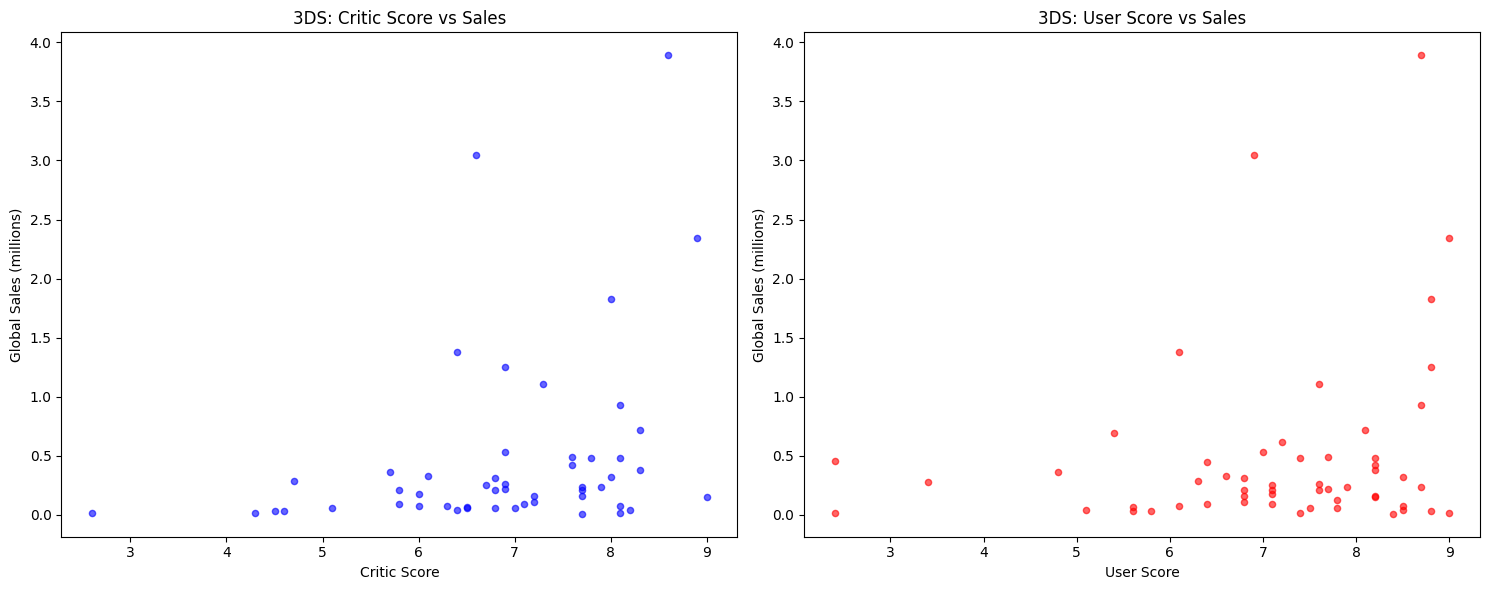

Correlación Critic Score vs Ventas: 0.285
Correlación User Score vs Ventas: 0.280


In [15]:
# Filtrar datos de 3DS
platform3ds_info = videogames_2014_2015_2016[videogames_2014_2015_2016["platform"]=="3DS"]

# Crear subplots para mostrar ambos gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Critic Score vs Ventas
platform3ds_info.plot(kind="scatter", x="critic_score", y="total_sales", 
              ax=ax1, alpha=0.6, color='blue')
ax1.set_xlabel("Critic Score")
ax1.set_ylabel("Global Sales (millions)")
ax1.set_title("3DS: Critic Score vs Sales")

# Gráfico 2: User Score vs Ventas  
platform3ds_info.plot(kind="scatter", x="user_score", y="total_sales", 
              ax=ax2, alpha=0.6, color='red')
ax2.set_xlabel("User Score") 
ax2.set_ylabel("Global Sales (millions)")
ax2.set_title("3DS: User Score vs Sales")

plt.tight_layout()
plt.show()

# Calcular correlaciones (eliminando valores NaN)
platform3ds_info_cleaned = platform3ds_info.dropna(subset=['critic_score', 'user_score', 'total_sales'])

platform3ds_critic_correlation = platform3ds_info_cleaned['critic_score'].corr(platform3ds_info_cleaned['total_sales'])
platform3ds_user_correlation = platform3ds_info_cleaned['user_score'].corr(platform3ds_info_cleaned['total_sales'])

print(f"Correlación Critic Score vs Ventas: {platform3ds_critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {platform3ds_user_correlation:.3f}")

Pareciera que se presentan los mismos comportamientos con los videojuegos entre las consolas PS4 y XOne, puesto que en ambos casos se presentan coeficientes de correlación similares de aproximadamente 0.4 para valoración del crítico vs ventas globales, y de casi 0 para valoración del usuario vs ventas globales.
Sin embargo, para una tercer plataforma (3DS), el comportamiento ya es diferente, puesto que se puede percibir que tanto para valoración del crítico como del usuario vs ventas globales, existe un coeficiente de correlación de aproximadamente 0.28, el cual es aún muy bajo como para confirmar que exista una relación lineal entre estas variables. Podríamos decir que el caso de 3DS es un caso extraordinario.

***Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?***

           genre  total_sales
0         Action      1744.17
10        Sports      1331.27
8        Shooter      1052.45
7   Role-Playing       934.56
4       Platform       827.77
3           Misc       802.51
6         Racing       728.67
2       Fighting       447.53
9     Simulation       389.97
5         Puzzle       242.57
1      Adventure       237.59
11      Strategy       174.23



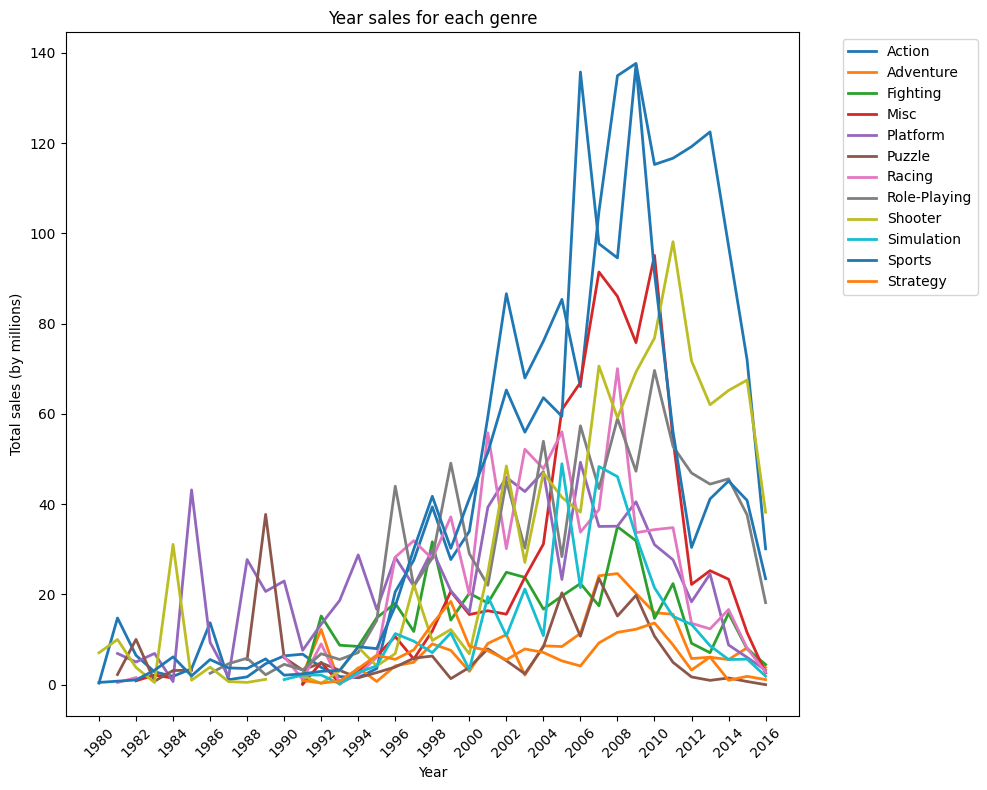

Los géneros de videojuegos que más han sido vendidos en la cercanía de 2016 son:
 genre
Shooter         38.22
Action          30.11
Sports          23.49
Role-Playing    18.18
Fighting         4.47
Adventure        3.82
Platform         3.23
Racing           2.79
Misc             2.60
Simulation       1.89
Strategy         1.13
Puzzle           0.01
Name: 2016, dtype: float64


In [16]:
#Generación de dataframe que detalla el total de ventas generadas por cada género de juego
videogames_totalsales_per_genre=videogames_2016.groupby(by="genre")["total_sales"].sum().reset_index()
videogames_totalsales_per_genre.columns=("genre","total_sales")
videogames_totalsales_per_genre.sort_values(by="total_sales",ascending=False,inplace=True)
print(videogames_totalsales_per_genre)
print()
#Generación de tabla dinámica que describa las ventas de cada género de videojuego por cada año
sales_by_genre_per_year=videogames_2016.pivot_table(index="genre",columns="year_of_release",values="total_sales",aggfunc="sum")
# Transponer la tabla para intercambiar filas y columnas
sales_by_genre_per_year_transposed = sales_by_genre_per_year.T
# Ahora graficar la distribución de ventas de todos los géneros
sales_by_genre_per_year_transposed.plot(kind='line', figsize=(10,8), linewidth=2)
plt.title('Year sales for each genre')
plt.xlabel('Year')
plt.ylabel('Total sales (by millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
specific_years = [1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016]
plt.xticks(specific_years, rotation=45)
plt.tight_layout()
plt.show()

top_genres_2016=sales_by_genre_per_year.sort_values(by=2016,ascending=False)
print("Los géneros de videojuegos que más han sido vendidos en la cercanía de 2016 son:\n",top_genres_2016[2016])

A partir de la tabla generada, que consiste en el listado de géneros ordenados de mayor a menor acorde al número de ventas totales en todos los datos del dataframe, y acorde a la gráfica de distribución de ventas de cada genero durante el paso de los años, se puede concluir que los generos que en mayor medida suele preferir el cliente son Shooter (tercer lugar en ventas totales y primer lugar en los años próximos a 2016), Action (primer lugar en ventas totales y segundo lugar en ventas en los años próximos a 2016), Sports (segundo lugar en ventas totales y tercer lugar en ventas en los años próximos a 2016), Role_Playing (cuarto lugar tanto en ventas totales como en ventas en los años próximos a 2016), y como menciones honoríficas estan Fighthing (quinto lugar en ventas en los años próximos a 2016 pero octavo lugar en ventas totales), Adventure (sexto lugar en ventas en los años próximos a 2016 pero onceavo lugar en ventas totales) y Platform (quinto lugar en ventas totales pero sétimo lugar en ventas en los años próximos a 2016).

Una información adicional respecto a los géneros menos vendidos es que géneros como Puzzle, Strategy y Simulation son el tipo de género que ni en ventas totales como en ventas en los años próximos a 2016 han resultado tener mucha participación.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>


# Paso 4.
### Crea un perfil de usuario para cada región
### Para cada región (NA, UE, JP) determina:



***Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.***

In [17]:

#Para NA. Creación de Dataframe que genera el total de ventas en la región de NA por plataforma
sales_na=videogames_2016.groupby(by="platform")["na_sales"].sum().reset_index()
sales_na.columns=("platform","na_sales")
sales_na.sort_values(by="na_sales",ascending=False,inplace=True)
print("Las 5 principales plataformas de la región NA son\n",sales_na.head())
print()
#Para NA. Creación de Dataframe que genera la cuota de mercado por plataforma en la región de NA
total_sales_na=sales_na["na_sales"].sum()
market_share_na=sales_na
market_share_na["na_sales"]=market_share_na["na_sales"]/total_sales_na*100
market_share_na.columns=("platform","market_share")
print("Las cuotas de mercado (en %) de las 5 principales plataformas de la región NA son\n",market_share_na.head())
print()
#Para UE. Creación de Dataframe que genera el total de ventas en la región de UE por plataforma
sales_eu=videogames_2016.groupby(by="platform")["eu_sales"].sum().reset_index()
sales_eu.columns=("platform","eu_sales")
sales_eu.sort_values(by="eu_sales",ascending=False,inplace=True)
print("Las 5 principales plataformas de la región UE son\n",sales_eu.head())
print()
#Para UE. Creación de Dataframe que genera la cuota de mercado por plataforma en la región de UE
total_sales_eu=sales_eu["eu_sales"].sum()
market_share_eu=sales_eu
market_share_eu["eu_sales"]=market_share_eu["eu_sales"]/total_sales_eu*100
market_share_eu.columns=("platform","market_share")
print("Las cuotas de mercado (en %) de las 5 principales plataformas de la región UE son\n",market_share_eu.head())
print()
#Para JP. Creación de Dataframe que genera el total de ventas en la región de JP por plataforma
sales_jp=videogames_2016.groupby(by="platform")["jp_sales"].sum().reset_index()
sales_jp.columns=("platform","jp_sales")
sales_jp.sort_values(by="jp_sales",ascending=False,inplace=True)
print("Las 5 principales plataformas de la región JP son\n",sales_jp.head())
#Para JP. Creación de Dataframe que genera la cuota de mercado por plataforma en la región de JP
total_sales_jp=sales_jp["jp_sales"].sum()
market_share_jp=sales_jp
market_share_jp["jp_sales"]=market_share_jp["jp_sales"]/total_sales_jp*100
market_share_jp.columns=("platform","market_share")
print("Las cuotas de mercado (en %) de las 5 principales plataformas de la región JP son\n",market_share_jp.head())
print()


Las 5 principales plataformas de la región NA son
    platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40

Las cuotas de mercado (en %) de las 5 principales plataformas de la región NA son
    platform  market_share
28     X360     13.690726
16      PS2     13.267372
26      Wii     11.291719
17      PS3      8.941796
4        DS      8.689783

Las 5 principales plataformas de la región UE son
    platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61

Las cuotas de mercado (en %) de las 5 principales plataformas de la región UE son
    platform  market_share
16      PS2     13.996304
17      PS3     13.625038
28     X360     11.169322
26      Wii     10.816620
15       PS      8.811785

Las 5 principales plataformas de la región JP son
    platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES  

Se puede percibir ciertas similitudes entre las top 5 plataformas de las regiones de NA y EU, puesto que aunque no se encuentran en el mismo orden, las consolas que prevalecen en ambas regiones son X360, PS2, PS3 y Wii. Mientras que por otra parte, las top 5 plataformas de las regiones de JP son DS, PS, PS2, SNES y 3DS; de las cuales solo coincide con las otras regiones las consolas PS (solo coincide con UE), DS (solo coincide con NA) y PS2 (coincide con ambas).

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al analizar plataformas y géneros, todo lo que no esté incluido en el TOP-5 podría combinarse en "otros", para que la imagen del análisis sea más completa.

</div>

***Los cinco géneros principales. Explica la diferencia.***

In [18]:
#Para NA. Creación de Dataframe que genera el total de ventas en la región de NA por género
sales_na_genre=videogames_2016.groupby(by="genre")["na_sales"].sum().reset_index()
sales_na_genre.columns=("genre","na_sales")
sales_na_genre.sort_values(by="na_sales",ascending=False,inplace=True)
print("Los 5 principales géneros de la región NA son\n",sales_na_genre.head())
print()
#Para UE. Creación de Dataframe que genera el total de ventas en la región de UE por género
sales_eu_genre=videogames_2016.groupby(by="genre")["eu_sales"].sum().reset_index()
sales_eu_genre.columns=("genre","eu_sales")
sales_eu_genre.sort_values(by="eu_sales",ascending=False,inplace=True)
print("Los 5 principales géneros de la región UE son\n",sales_eu_genre.head())
print()
#Para JP. Creación de Dataframe que genera el total de ventas en la región de JP por género
sales_jp_genre=videogames_2016.groupby(by="genre")["jp_sales"].sum().reset_index()
sales_jp_genre.columns=("genre","jp_sales")
sales_jp_genre.sort_values(by="jp_sales",ascending=False,inplace=True)
print("Los 5 principales géneros de la región JP son\n",sales_jp_genre.head())

Los 5 principales géneros de la región NA son
        genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27

Los 5 principales géneros de la región UE son
       genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74

Los 5 principales géneros de la región JP son
            genre  jp_sales
7   Role-Playing    355.41
0         Action    161.43
10        Sports    135.54
4       Platform    130.83
3           Misc    108.11


De forma similar a como pasó en el escenario de plataformas, se puede percibir ciertas similitudes entre los top 5 géneros de las regiones de NA y EU, puesto que aunque no se encuentran en el mismo orden, los géneros que prevalecen en ambas regiones son Action, Sports, Shooter y Misc. Mientras que por otra parte, los top 5 géneros de la región de JP son Role_Playing, Action, Sports, Platform y Misc; de las cuales solo coincide con las otras regiones los generos Action (con ambos), Sports (con ambos), Platform (solo con NA) y Misc (con ambos); considerando que las coincidencias solo son de título, puesto que JP tiene un distinto orden en su top para las coincidencias encontradas con las otras regiones.

***Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.***

In [19]:
#Para NA. Creación de Dataframe que genera el total de ventas en la región de NA por rating
sales_na_rating=videogames_2016.groupby(by="rating")["na_sales"].sum().reset_index()
sales_na_rating.columns=("rating","na_sales")
sales_na_rating.sort_values(by="na_sales",ascending=False,inplace=True)
print("Las 5 principales clasificaciones de ESRB de la región NA son\n",sales_na_rating.head())
print()
#Para UE. Creación de Dataframe que genera el total de ventas en la región de UE por rating
sales_eu_rating=videogames_2016.groupby(by="rating")["eu_sales"].sum().reset_index()
sales_eu_rating.columns=("rating","eu_sales")
sales_eu_rating.sort_values(by="eu_sales",ascending=False,inplace=True)
print("Las 5 principales clasificaciones de ESRB de la región UE son\n",sales_eu_rating.head())
print()
#Para JP. Creación de Dataframe que genera el total de ventas en la región de JP por rating
sales_jp_rating=videogames_2016.groupby(by="rating")["jp_sales"].sum().reset_index()
sales_jp_rating.columns=("rating","jp_sales")
sales_jp_rating.sort_values(by="jp_sales",ascending=False,inplace=True)
print("Las 5 principales clasificaciones de ESRB de la región JP son\n",sales_jp_rating.head())

Las 5 principales clasificaciones de ESRB de la región NA son
   rating  na_sales
1      E   1292.99
7      T    759.75
5      M    748.48
2   E10+    353.32
4    K-A      2.56

Las 5 principales clasificaciones de ESRB de la región UE son
   rating  eu_sales
1      E    710.25
5      M    483.97
7      T    427.03
2   E10+    188.52
0     AO      0.61

Las 5 principales clasificaciones de ESRB de la región JP son
   rating  jp_sales
1      E    198.11
7      T    151.40
5      M     64.24
2   E10+     40.20
4    K-A      1.46


Para el caso de las clasificaciones de ESRB, ocurre una peculiaridad diferente, puesto que de la iformación anterior se puede ver que los comportamientos entre NA y JP son prácticamente idénticos en orden de las clasificaciones, mientras que ahora la región de la que se puede percibir un orden diferente es UE. Sin embargo, aunque el orden entre las regiones NA y JP son idénticos, se puede percibir que las ventas generadas por cada clasificación es considerablemente diferente, puesto que en ambos el primer lugar de clasificación es E, pero en NA se generó un total de 1292.99 M, mientras que en Jp se ha generado un número mucho más reducido de 198.11 M.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El análisis realizado por cada región está muy bien fundamentado. Además, los resultados se presentan de forma clara y ordenada, lo que facilita la comprensión de la información. Esto permite identificar rápidamente las diferencias y similitudes entre cada región, y contribuye a un mejor entendimiento de los patrones generales. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como sugerencia, podrías agregar una visualización comparativa (por ejemplo, un gráfico de barras apiladas o un heatmap) para reforzar visualmente los contrastes entre regiones en géneros o plataformas.

</div>

</div>

# Paso 5.
### Prueba las siguientes hipótesis:

***Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.***



Hipótesis Nula (H₀):
"Las calificaciones promedio de los usuarios para Xbox One y PC son iguales"
H₀: μ_Xbox = μ_PC

Hipótesis Alternativa (H₁):
"Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes"
H₁: μ_Xbox ≠ μ_PC



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has definido correctamente las hipótesis.

</div>

In [27]:
#Generación de las muestras de evaluaciones de usuario para Xbox One y PC
user_scores_xone=videogames_2016[videogames_2016["platform"]=="XOne"]["user_score"]
user_scores_pc=videogames_2016[videogames_2016["platform"]=="PC"]["user_score"]
#Limpieza de los valores ausentes de ambas muestras
user_scores_xone_clean = user_scores_xone.dropna()
user_scores_pc_clean = user_scores_pc.dropna()

alpha = 0.05

results = st.ttest_ind(user_scores_xone_clean,user_scores_pc_clean,equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

***Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.***

Hipótesis Nula (H₀):
"Las calificaciones promedio de los usuarios para Acción y Deportes son iguales"
H₀: μ_Action = μ_Sports

Hipótesis Alternativa (H₁):
"Las calificaciones promedio de los usuarios para Action y Sports son diferentes"
H₁: μ_Action ≠ μ_Sports


In [28]:
#Generación de las muestras de evaluaciones de usuario para Acción y Deportes
user_scores_action=videogames_2016[videogames_2016["genre"]=="Action"]["user_score"]
user_scores_sports=videogames_2016[videogames_2016["genre"]=="Sports"]["user_score"]
#Limpieza de los valores ausentes de ambas muestras
user_scores_action_clean = user_scores_action.dropna()
user_scores_sports_clean = user_scores_sports.dropna()

alpha = 0.05

results = st.ttest_ind(user_scores_action_clean,user_scores_sports_clean,equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula


¿Por qué se formularon así las hipótesis nula y alternativa de cada hipótesis particular
- Hipótesis nula: Asume que NO hay diferencia
- Hipótesis alternativa: Propone que SÍ hay diferencia

Además, el planteamiento para probar las hipótesis fue el siguiente:
- Bilateral, porque se está probando si las calificaciones son "las mismas" vs "diferentes", no si una es mayor que la otra.
- Comparación de medias entre 2 muestras, ya que se está comparando las calificaciones promedio entre dos grupos independientes.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
Los resultados obtenidos son coherentes con lo esperado. Muy buen trabajo aplicando las pruebas de hipótesis!

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
He notado que hay fragmentos de código repetidos en ambos procesos. Sería recomendable encapsularlos en funciones para mejorar la reutilización y mantener un código más limpio y modular.
</div>

</div>

# Paso 6.
### Escribe una conclusión general

***Análisis Temporal del Mercado***
Descubrimiento clave: El mercado de videojuegos experimentó un crecimiento exponencial desde 1994, alcanzando su pico en 2008-2009 con más de 1,400 juegos anuales.

***Ciclo de vida de plataformas:***

- Tiempo para establecerse: 2-4 años (excepto PC con 17 años)
- Duración en el mercado: 7-11 años antes de declinar
- Plataformas dominantes 2014-2016: PS4, XOne, 3DS

***Análisis de Plataformas***

Hallazgos principales:

- Líderes históricos: PS2 (1,255M), X360 (971M), PS3 (939M)
- Futuro del mercado (2016): PS4 liderando con 69.25M, seguido de XOne (26.15M)
- Diferencias regionales significativas: Las preferencias varían considerablemente entre NA, EU y JP

***Impacto de las Valoraciones en Ventas***

Descubrimiento sorprendente:

- Valoraciones de críticos: Correlación baja pero positiva (0.4 en PS4/XOne, 0.28 en 3DS)
- Valoraciones de usuarios: Prácticamente sin correlación con ventas (cerca de 0)
- Implicación: El éxito comercial no depende fuertemente de las reseñas

***Análisis de Géneros***

Géneros más rentables globalmente:

- Action (1,744M)
- Sports (1,331M)
- Shooter (1,052M)
- Role-Playing (934M)

Tendencia 2016: Shooter liderando ventas recientes, seguido de Action y Sports.

***Perfiles Regionales***

Diferencias culturales identificadas:

- NA y EU: Preferencias similares (Action, Sports, Shooter
- JP: Mercado único con preferencia por Role-Playing y plataformas Nintendo
- Clasificaciones ESRB: Rating "E" domina en todas las regiones

***Validación de Hipótesis Estadísticas***

Resultados de pruebas t:

- Xbox One vs PC: Diferencias significativas en valoraciones de usuarios (p < 0.001)
- Action vs Sports: No hay diferencias significativas (p = 0.115)

***Recomendaciones Estratégicas para 2017***

Basado en tus análisis:

- Enfocar en PS4 y XOne como plataformas principales
- Priorizar géneros Action, Shooter y Sports
- Adaptar estrategias por región: especialmente para el mercado japonés
- No depender únicamente de reseñas para predecir éxito comercial